# Evaluation week 2 project 5 Census Income

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Documents/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#getting the first 5 rows of the dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# checking the shape of dataset by getting no of rows and columns
df.shape

(32560, 15)

In [6]:
# checking full information ablout dataset about null valuse and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# describing the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.describe(include='all')

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
# now we will be checking the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [15]:
# getting information about name of columns present in dataset
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

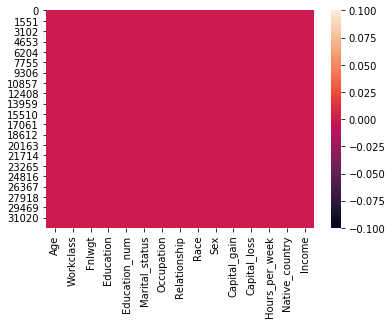

In [10]:
# checking the relationship of variables
sns.heatmap(df.isnull())

In [11]:
# now we easily see that there are some null values in the dataset which are presented by ? so we need to convert them into 
df[df == ' ?'] = np.nan

In [12]:
# now we need to check that how many missing values present in each column-
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

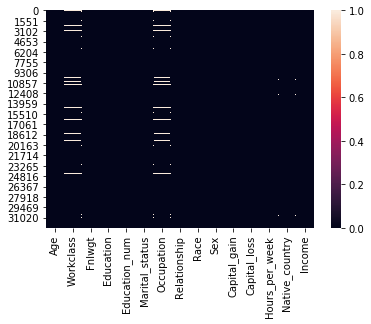

In [13]:
# plotting the heatmap of all the missing data
sns.heatmap(df.isnull())

In [14]:
# percentage of data missing from each column of the dataframe
df.isnull().mean()

Age               0.000000
Workclass         0.056388
Fnlwgt            0.000000
Education         0.000000
Education_num     0.000000
Marital_status    0.000000
Occupation        0.056603
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.000000
Native_country    0.017905
Income            0.000000
dtype: float64

In [ ]:
# now we will start the data analysis and building the model-
# for that we will be checking the relationship of variables by plottong the graphs -

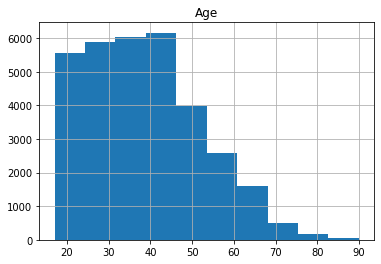

In [16]:
df['Age'].hist(grid=True)
plt.title('Age')
plt.show()

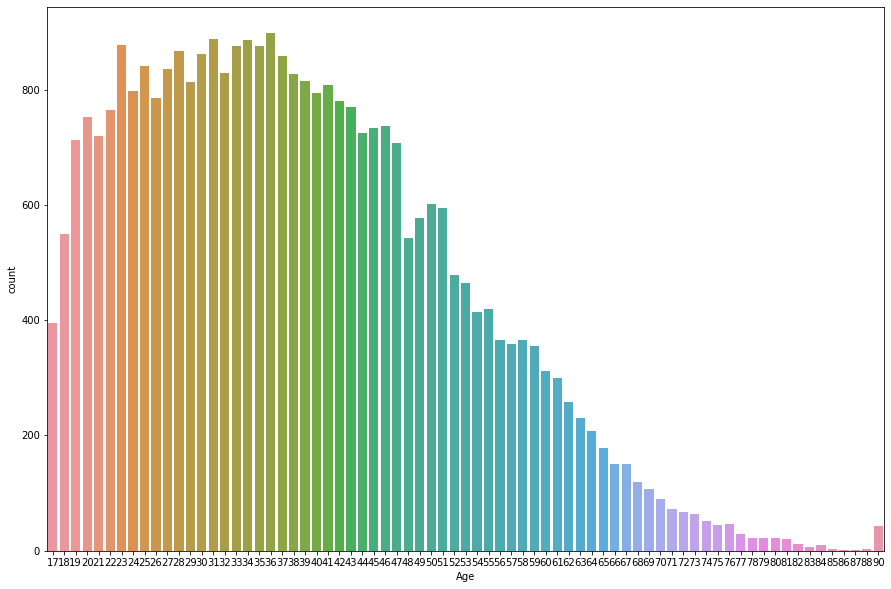

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(df.Age)

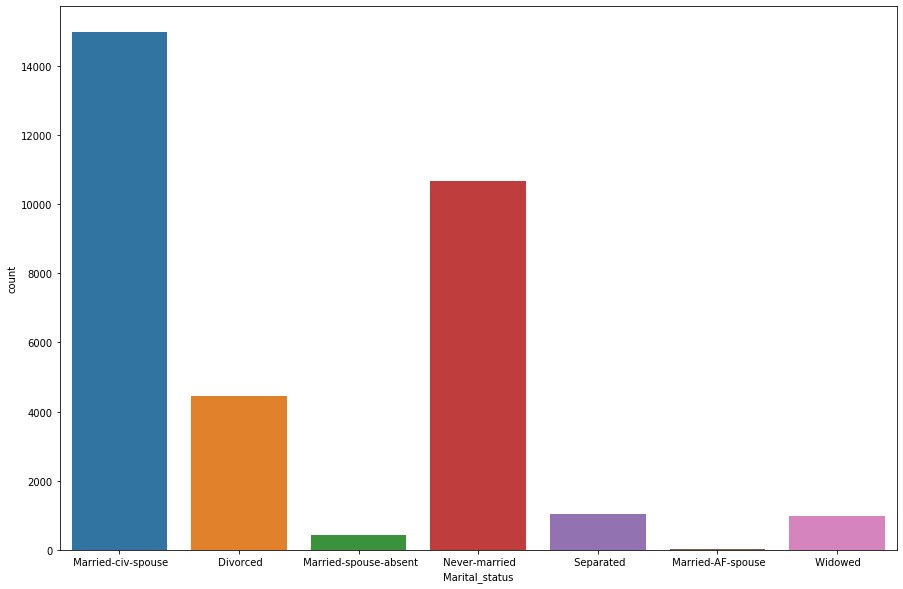

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(df.Marital_status)

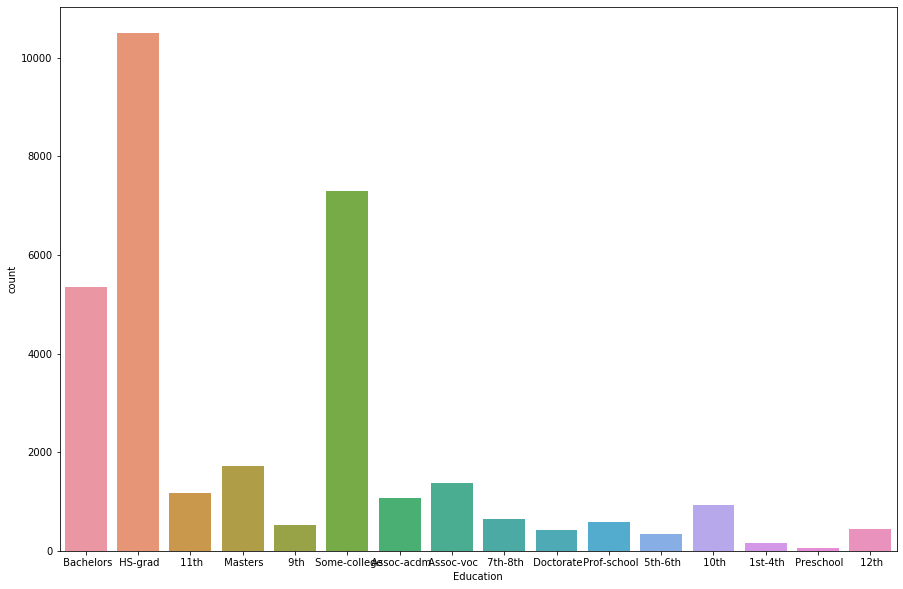

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(df.Education)

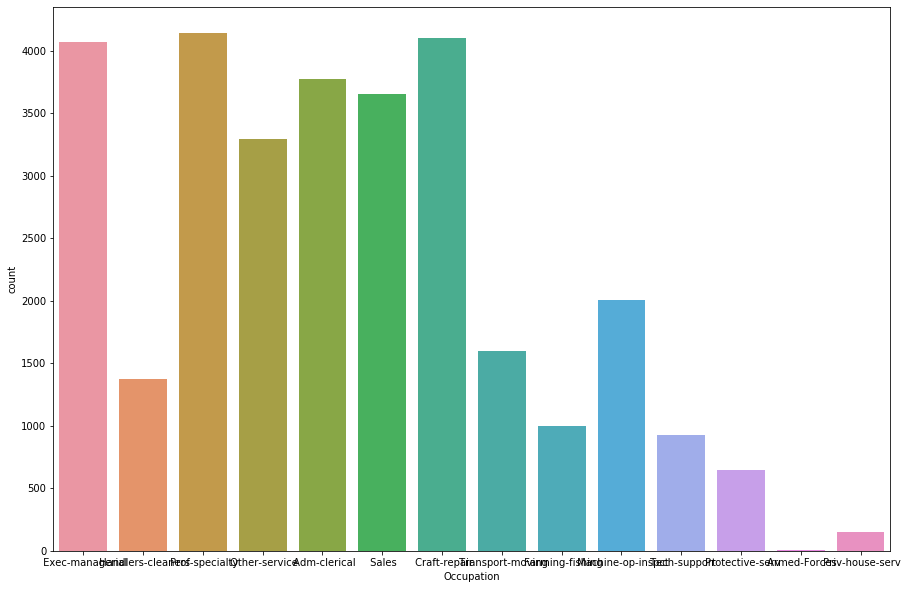

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(df.Occupation)

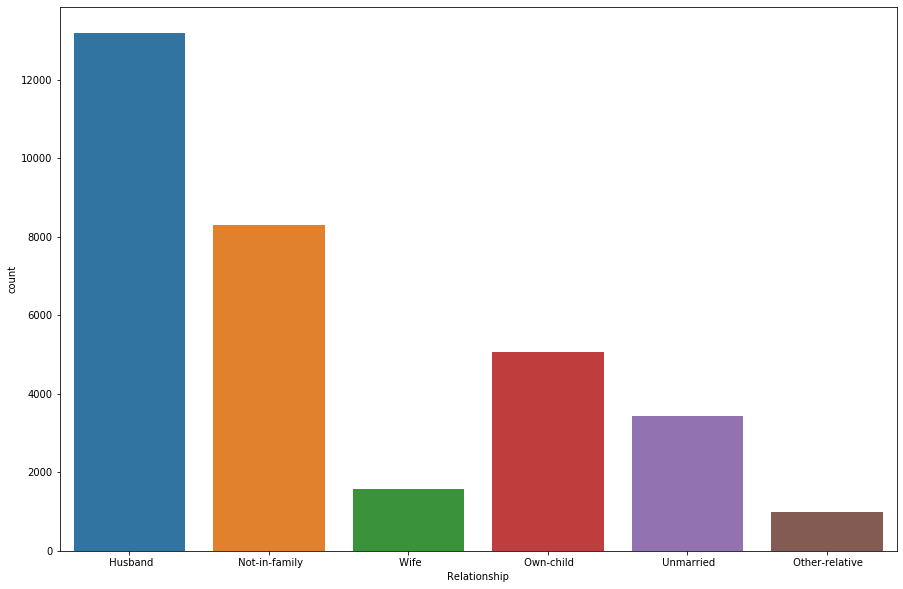

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(df.Relationship)

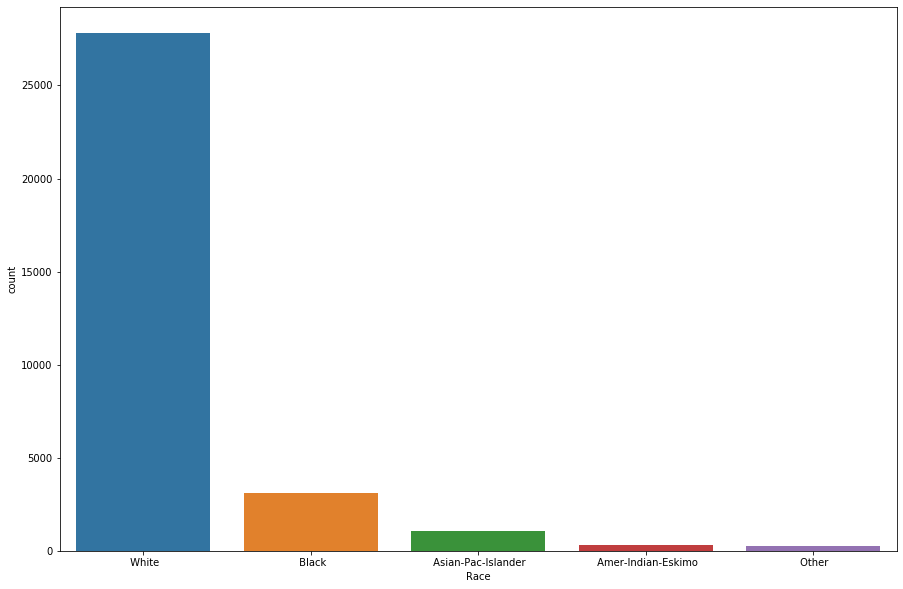

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(df.Race)

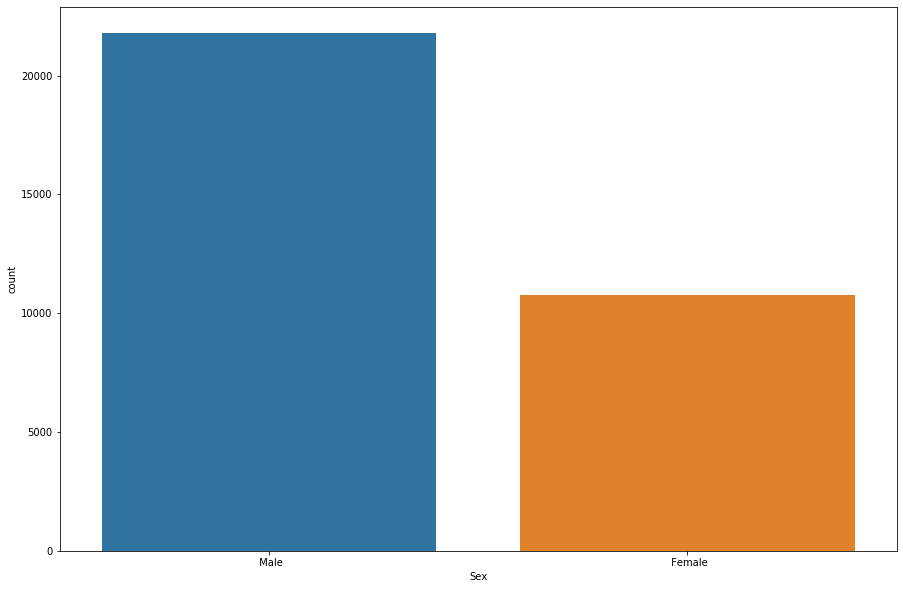

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(df.Sex)

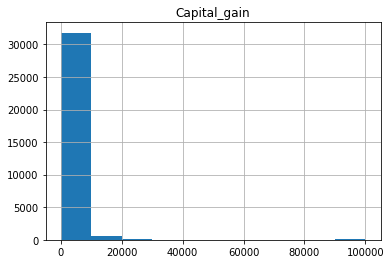

In [24]:
df["Capital_gain"].hist(grid=True)
plt.title("Capital_gain")
plt.show()

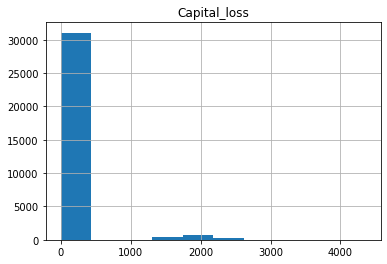

In [25]:
df["Capital_loss"].hist(grid=True)
plt.title("Capital_loss")
plt.show()

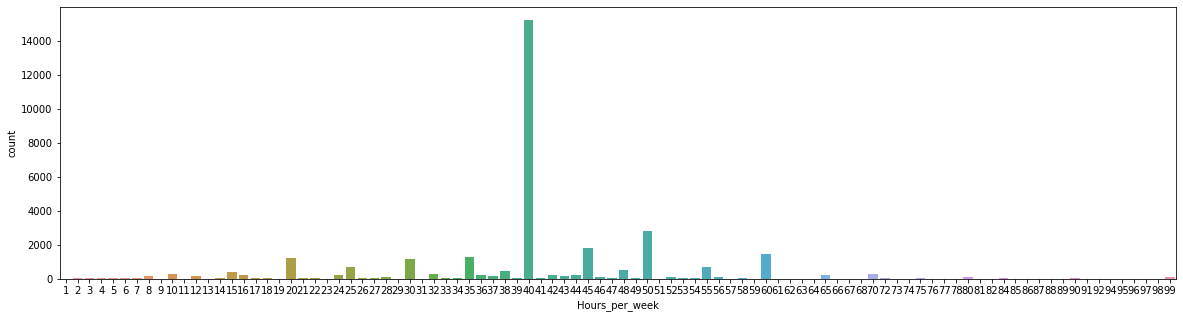

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(df.Hours_per_week)

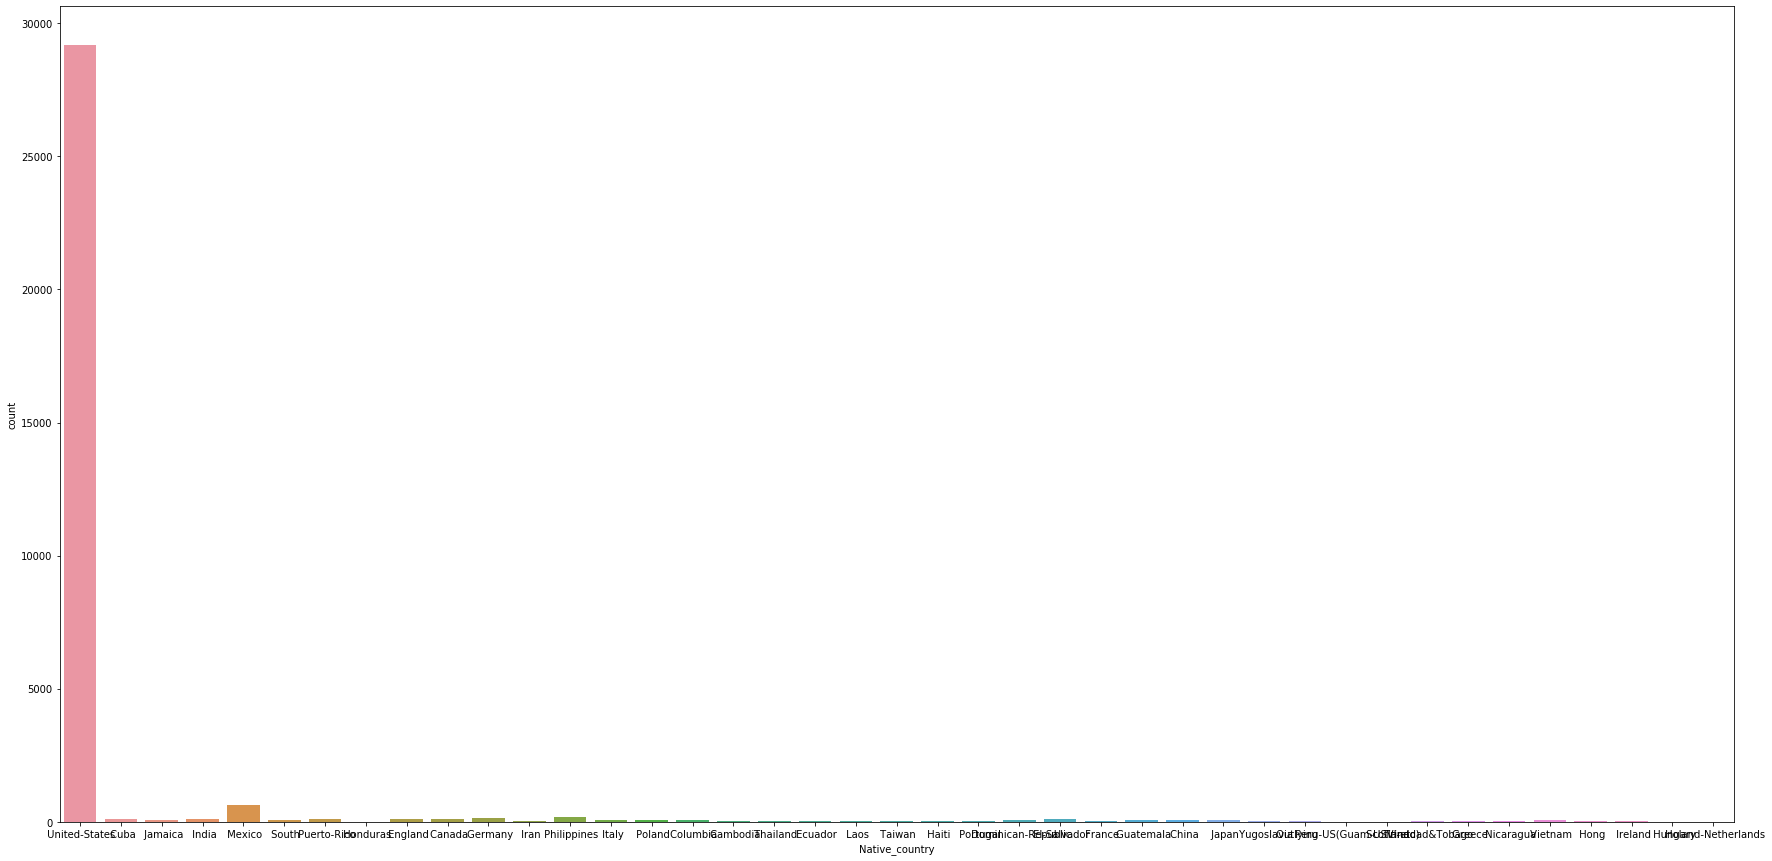

In [28]:
plt.figure(figsize=(30,15))
sns.countplot(df.Native_country)

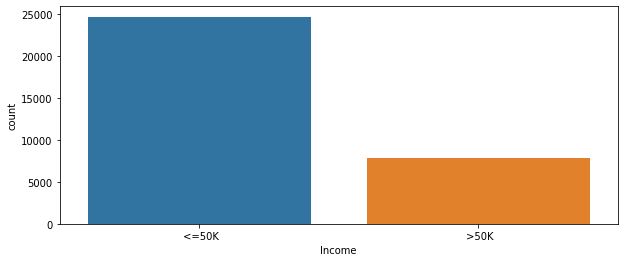

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(df.Income)

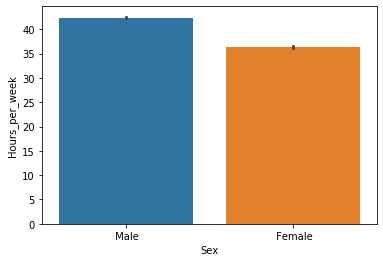

In [30]:
sns.barplot(df.Sex,df['Hours_per_week'])

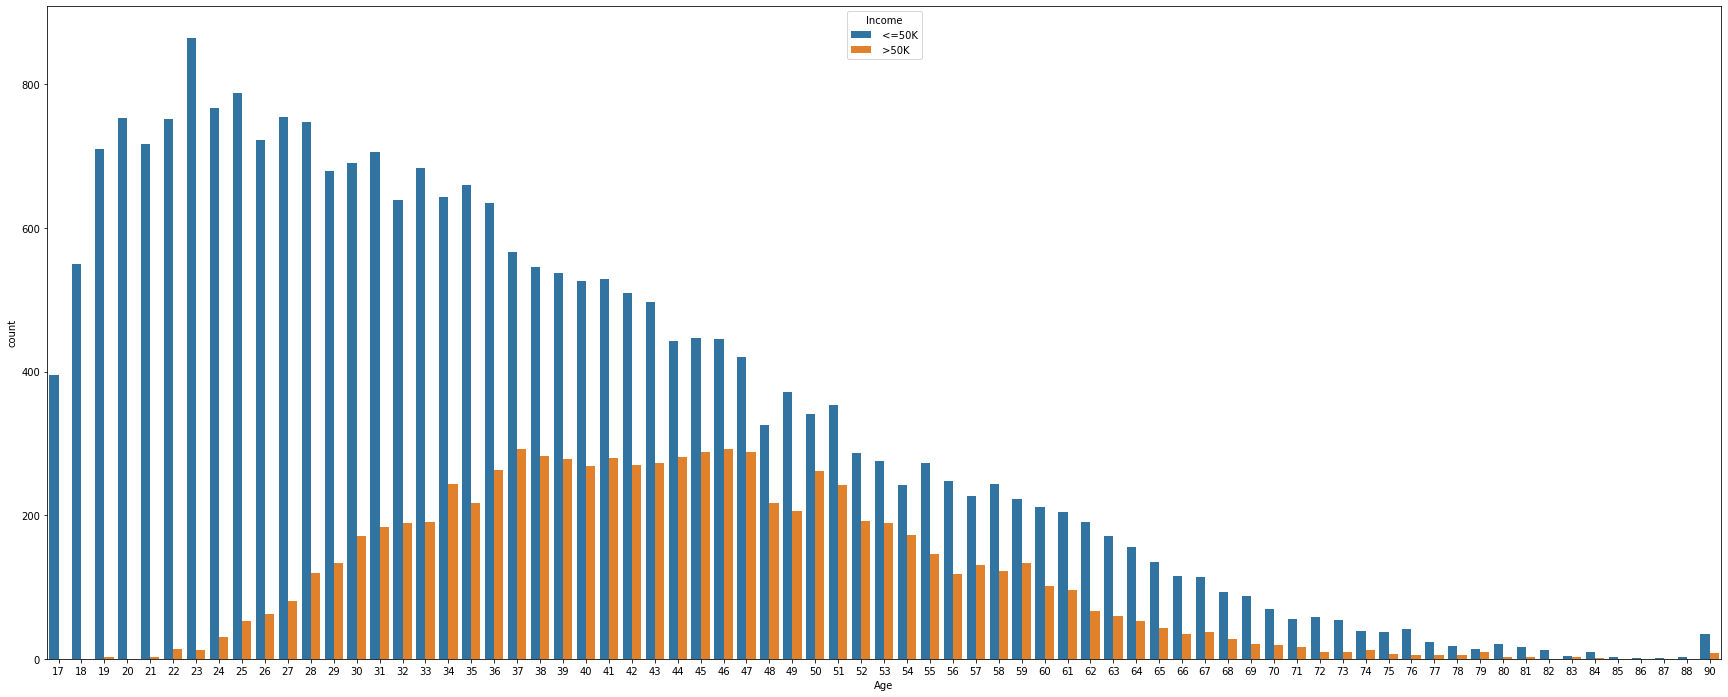

In [31]:
plt.figure(figsize=(30,12))
sns.countplot(df['Age'],hue=df.Income)

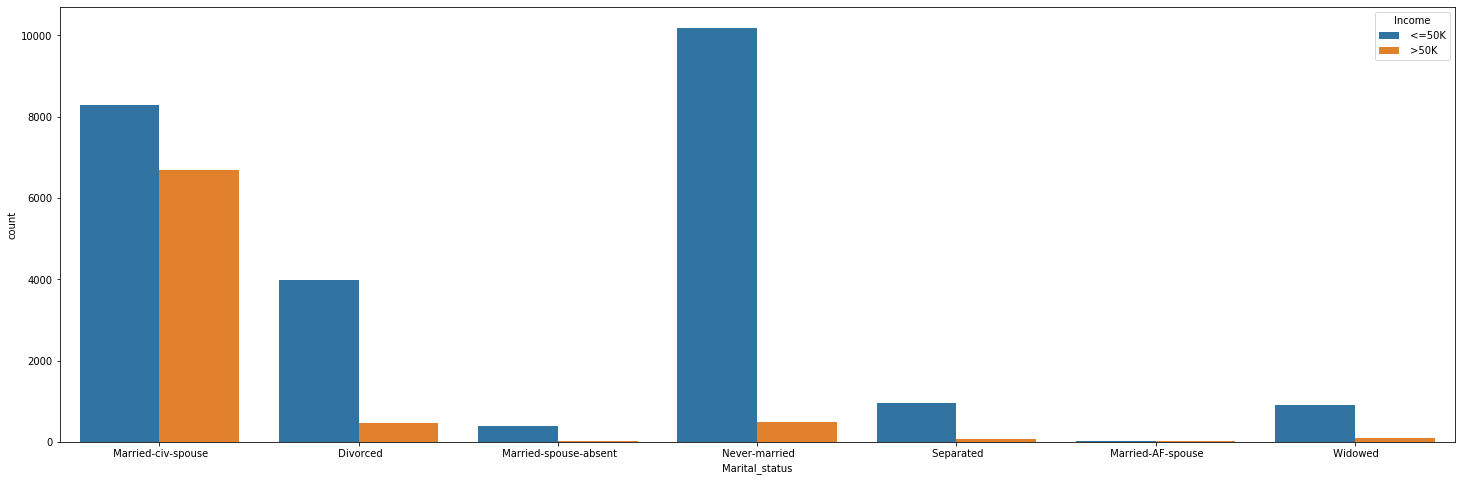

In [32]:
plt.figure(figsize=(25,8))
sns.countplot(df['Marital_status'],hue=df.Income)

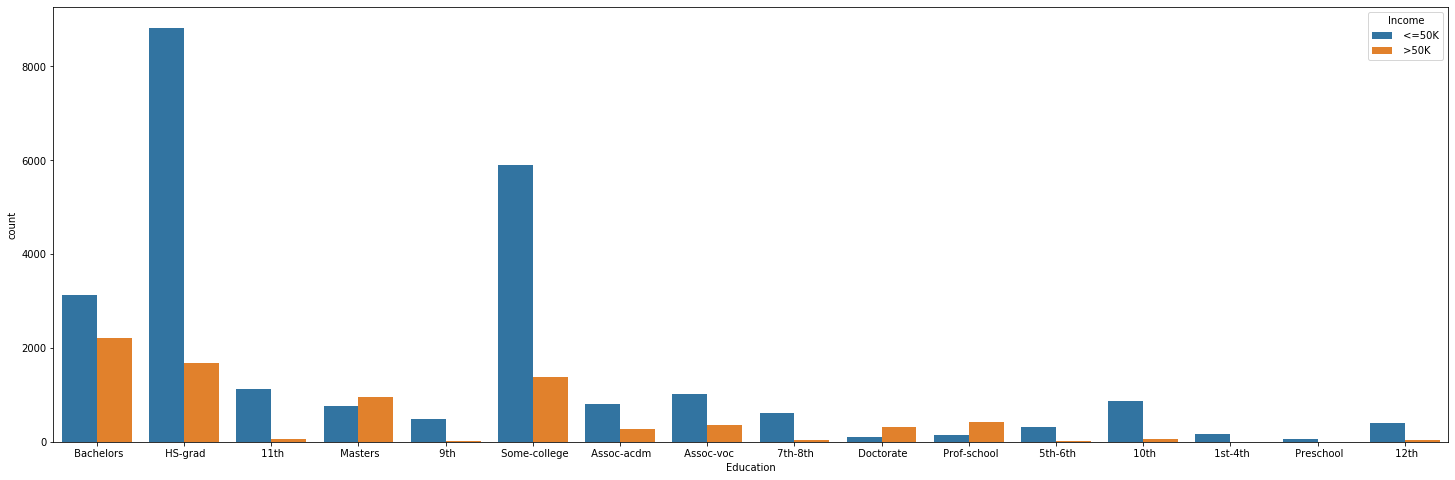

In [33]:
plt.figure(figsize=(25,8))
sns.countplot(df['Education'],hue=df.Income)

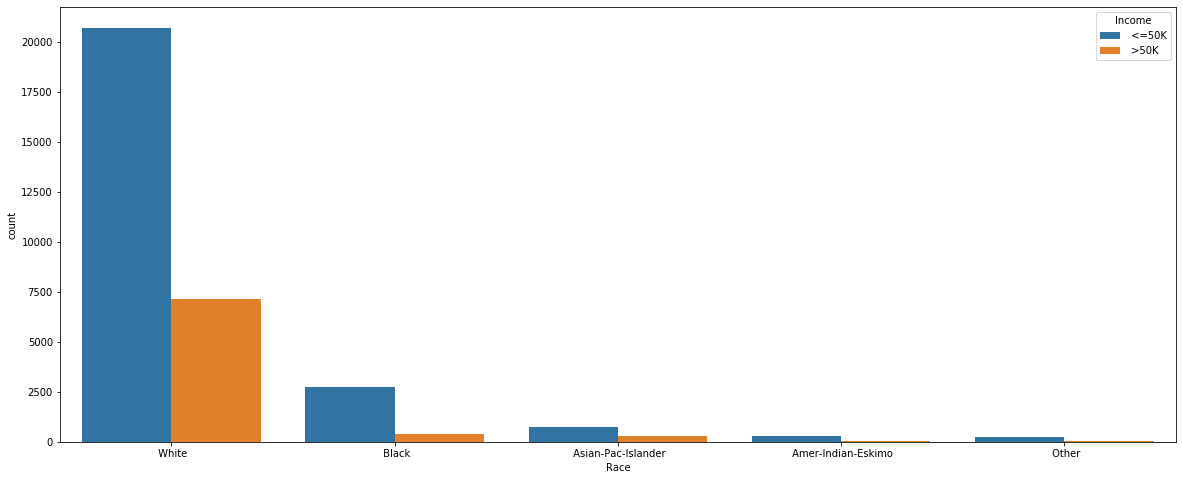

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(df['Race'],hue=df.Income)

In [ ]:
# now we have seen the univariate and bivariate analysis in which we have observed that male sex has earned more and those who are white has earned more than 50k.

In [35]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [ ]:
# now we have seen that our data has null values and all the columns has string type data  so need to encode them by using label encoder

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for val in cols:
    df[val]=le.fit_transform(df[val].astype(str))

In [46]:
cols=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country','Income']

In [47]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,Bachelors,13,2,8,0,4,1,0,0,13,32,0
1,38,3,215646,HS-grad,9,0,10,1,4,1,0,0,40,32,0
2,53,3,234721,11th,7,2,10,0,2,1,0,0,40,32,0
3,28,3,338409,Bachelors,13,2,14,5,2,0,0,0,40,34,0
4,37,3,284582,Masters,14,2,8,5,4,0,0,0,40,32,0


In [48]:
# now after checking the first 5 rows of dataset we have found that fnlwgt and education column has least importance in predicting the income so we can leave that
df1=df.drop(["Fnlwgt","Education"],axis=1)

In [49]:
# now after leaving the columns we need to check and confirm the dataset
df1.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,8,0,4,1,0,0,13,32,0
1,38,3,9,0,10,1,4,1,0,0,40,32,0
2,53,3,7,2,10,0,2,1,0,0,40,32,0
3,28,3,13,2,14,5,2,0,0,0,40,34,0
4,37,3,14,2,8,5,4,0,0,0,40,32,0


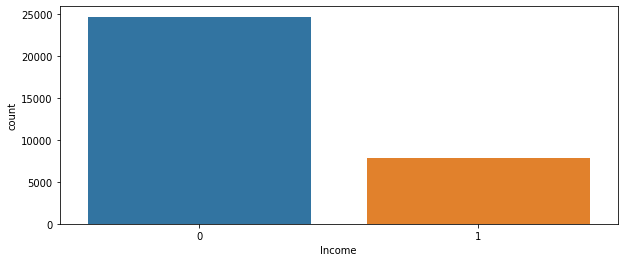

In [50]:
plt.figure(figsize=(10,4))
sns.countplot(df1.Income)

In [ ]:
# now as the next step we need to remove outliers so we will use Z score technique-

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape

(32560, 13)

In [52]:
threshold=3
print(np.where(z>3))

(array([    5,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([11, 10,  6, ..., 11,  6,  6], dtype=int64))


In [53]:
df1_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df1_new.shape)

(32560, 13)
(28293, 13)


Percentage Data Loss

In [54]:
loss_percent=((32560-28094)/32560)*100
loss_percent

13.716216216216214

In [ ]:
# as now we need to start building the model we need to split the dataset into x and y where x=feature and y = label

In [55]:
x=df1.drop("Income",axis=1)
y=df1["Income"]

In [ ]:
#Starting the Logistic Regression model-

In [56]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is ", maxAccu,"on Random_State",maxRs)

Best Accuracy is  0.8171068796068796 on Random_State 22


In [ ]:
# now we got the accuracy 81% and random score 22 thus we will this RS value to train and test the model so we will use train test split model-

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=22)

In [58]:
# importing necessary libraries about thr models to check the best fit model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

lg=LogisticRegression()
sv=SVC()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()

In [59]:
model=[lg,sv,rf,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score: of',m)
    acc=accuracy_score(y_test,pred)
    print(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between Accuracy Score and CrossValidation Score:",abs(acc-crossval))
    print("\n")

Accuracy score: of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8171068796068796
[[4711  249]
 [ 942  610]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4960
           1       0.71      0.39      0.51      1552

    accuracy                           0.82      6512
   macro avg       0.77      0.67      0.70      6512
weighted avg       0.80      0.82      0.80      6512

Cross Validation Score: 0.8075552825552826
Difference Between Accuracy Score and CrossValidation Score: 0.009551597051596916


Accuracy score: of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', k

In [ ]:
# now we have checked the accuracy score of all the related model with cross validation so we have found our best model.
# now we can save the model

In [2]:
import joblib

In [ ]:
joblib.dump(knn,'census_income_model.obj')